## UBS AG Trigger Autocallable Contingent Yield Notes - Valuation Model

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from statistics import mean

In [2]:
# ENTER INPUT FOR: S0 = Initial Stock Level
S0 = 73.58
# ENTER INPUT FOR: K = Call Threshold Level
K = 73.58
# ENTER INPUT FOR: sigma = Annualized (Future) Volatility of Stock Price Returns
sigma = 0.30429
# ENTER INPUT FOR: r = Annualized Continously Compounded Risk-free Rate (From Trade Date to Final Valuation Date)
r = 0.0389206905853981 
# ENTER INPUT FOR: r = Annualized Continously Compounded Risk-free Rate (From Final Valuation Date to Maturity Date)
r1 = 0.038894121174441
# ENTER INPUT FOR: T = Time Length of Note from Trade Date to Final Valuation Date
T = 3.0027397260274
# ENTER INPUT FOR: D = proportional dividend
D = 0.02977
# ENTER INPUT FOR: B = Coupon Barrier/Downside Threshold Level
B = 39.62
# ENTER INPUT FOR: N = Number of steps
N = 10960
# ENTER INPUT FOR: Coupon = Quarterly Coupon Amount ($)
Coupon = 0.215
# ENTER INPUT FOR: TB = Coupon observation dates
TB = [0.246575342465753, 0.495890410958904, 0.747945205479452, 1.00547945205479, 1.25479452054795, 1.5041095890411, 1.75342465753425, 2.0027397260274, 2.25205479452055, 2.5013698630137, 2.75068493150685]
# ENTER INPUT FOR: TC = Call observation dates
TC = [0.495890410958904, 0.747945205479452, 1.00547945205479, 1.25479452054795, 1.5041095890411, 1.75342465753425, 2.0027397260274, 2.25205479452055, 2.5013698630137, 2.75068493150685]
# ENTER INPUT FOR: TD = Ex-dividend dates
TD = [0.0849315068493151, 0.334246575342466, 0.583561643835616, 0.832876712328767, 1.08219178082192, 1.33150684931507, 1.58082191780822, 1.83013698630137, 2.07945205479452, 2.32876712328767, 2.57808219178082, 2.82739726027397]

In [3]:
def CRR_DiscreteBarrierD(S0, D, FV, K, B, T, r, sigma, start_step, N):
    crr_DB_result = []
    option_value = np.zeros([N+1,N+1])
    stock_value = np.zeros([N+1,N+1])
    
    for n in range(start_step,N+1):
        delta = T/n
        u = np.exp(sigma*(delta**0.5))
        d = 1/u
        qu = (np.exp(r*delta)-d)/(u-d)
        qd = 1-qu
        jB1 = [j/delta for j in TB]
        jB = [int(j) for j in jB1]
        jC1 = [j/delta for j in TC]
        jC = [int(j) for j in jC1]
        jD1 = [j/delta for j in TD]
        jD = [np.ceil(j) for j in jD1]
        stock_value[0,0] = S0
        j = n
        
        for j in range (1,n+1):
            stock_value[j,0] = stock_value[j-1,0]*d 
            for i in range(1,j+1):    
                stock_value[j,i] = stock_value[j-1,i-1]*u
            if j in jD:
                stock_value[j,:] *= (1-(D/4))
        
        for i in range(0,j+1):
            if stock_value[j,i] < B:
                option_value[j,i] = (FV*(stock_value[j,i]/S0))*np.exp(-(r1*(3/365)))
            else: option_value[j,i] = (FV + Coupon)*np.exp(-(r1*(3/365)))
                
        for j in range(n-1,-1,-1):
            for i in range(j,-1,-1):
                cv = np.exp(-r*delta)*(qu*option_value[j+1,i+1]+qd*option_value[j+1,i])
                option_value[j,i] = cv
                
                if j in jB[0:2]:
                    if stock_value[j,i] >= B:
                        option_value[j,i] = cv + Coupon*np.exp(-(r*(4/365)))
                if j == jB[2]:
                    if stock_value[j,i] >= B:
                        option_value[j,i] = cv + Coupon*np.exp(-(r*(5/365)))
                if j in jB[3:11]:
                    if stock_value[j,i] >= B:
                        option_value[j,i] = cv + Coupon*np.exp(-(r*(2/365)))
                        
                if j in jC[0:2]:
                    if stock_value[j,i] >= K:
                        option_value[j,i] = FV + Coupon*np.exp(-(r*(4/365)))
                if j == jC[2]:
                    if stock_value[j,i] >= K:
                        option_value[j,i] = FV + Coupon*np.exp(-(r*(5/365)))
                if j in jC[3:11]:
                    if stock_value[j,i] >= K:
                        option_value[j,i] = FV + Coupon*np.exp(-(r*(2/365)))
                
        output = {'num_steps': n, 'CRR_DB': option_value[0,0]}
        crr_DB_result.append(output)
        
    return crr_DB_result

#### sigma = 0.30429

In [4]:
s1 = CRR_DiscreteBarrierD(S0, D, 10, K, B, T, r, sigma, N, N)
s1

[{'num_steps': 10960, 'CRR_DB': 9.863609763438589}]

#### sigma = 30.945

In [5]:
s2 = CRR_DiscreteBarrierD(S0, D, 10, K, B, T, r, 0.30945, N, N)
s2

[{'num_steps': 10960, 'CRR_DB': 9.834502514450469}]

#### sigma = 31.309

In [6]:
s3 = CRR_DiscreteBarrierD(S0, D, 10, K, B, T, r, 0.31309, N, N)
s3

[{'num_steps': 10960, 'CRR_DB': 9.822491537791022}]

#### sigma = 32.355

In [7]:
s4 = CRR_DiscreteBarrierD(S0, D, 10, K, B, T, r, 0.32355, N, N)
s4

[{'num_steps': 10960, 'CRR_DB': 9.761237107291482}]

#### sigma = 33.974

In [8]:
s5 = CRR_DiscreteBarrierD(S0, D, 10, K, B, T, r, 0.33974, N, N)
s5

[{'num_steps': 10960, 'CRR_DB': 9.677750618275537}]

#### sigma = 37.1

In [9]:
s6 = CRR_DiscreteBarrierD(S0, D, 10, K, B, T, r, 0.371, N, N)
s6

[{'num_steps': 10960, 'CRR_DB': 9.509980568427999}]

#### Average value

In [10]:
Average = mean([s1[0]['CRR_DB'],s2[0]['CRR_DB'],s3[0]['CRR_DB'],s4[0]['CRR_DB'],s5[0]['CRR_DB'],s6[0]['CRR_DB']])
Average

9.74492868494585

### Varying number of steps

In [11]:
crr_results1 = CRR_DiscreteBarrierD(S0, D, 10, K, B, T, r, sigma, 50, 1096)

In [12]:
df1 = pd.DataFrame.from_dict(crr_results1)

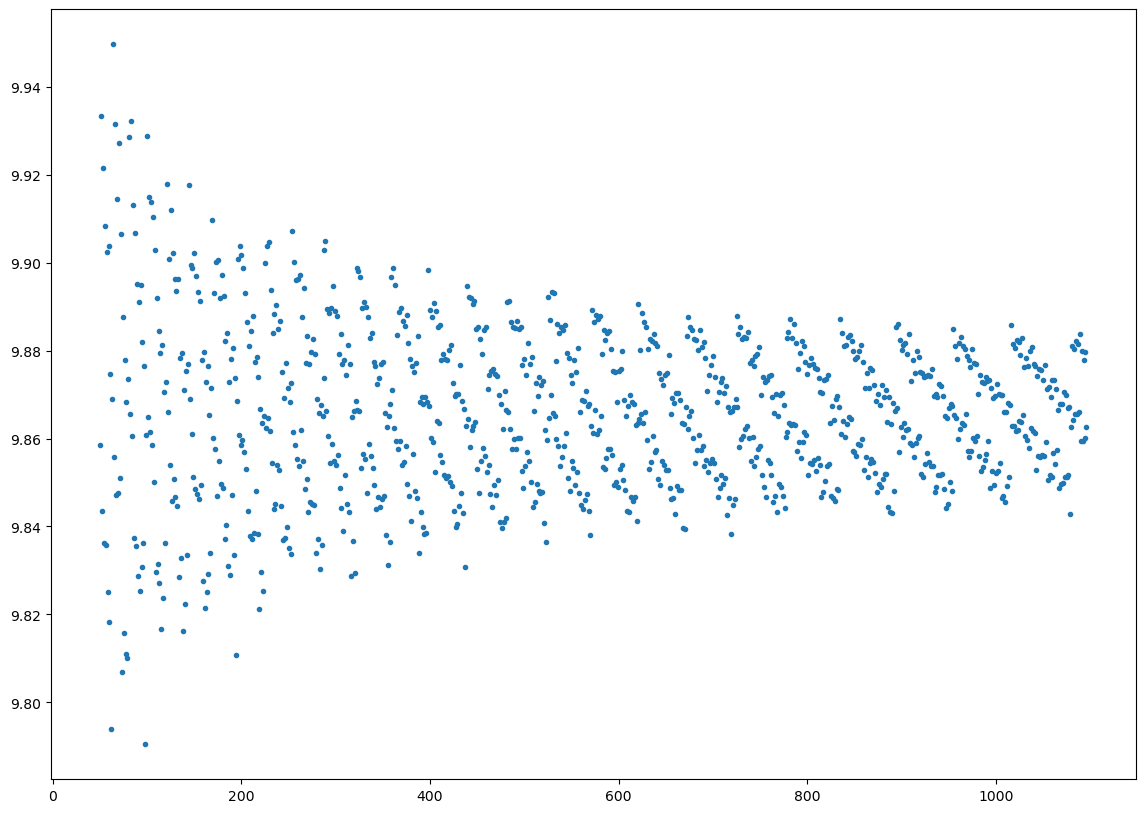

In [13]:
plt.figure(figsize=(14,10))
plt.plot(df1['num_steps'],df1['CRR_DB'],'o', markersize=3)
plt.show()

In [14]:
crr_results2 = CRR_DiscreteBarrierD(S0, D, 10, K, B, T, r, sigma, 4384, 4500)

In [15]:
df2 = pd.DataFrame.from_dict(crr_results2)

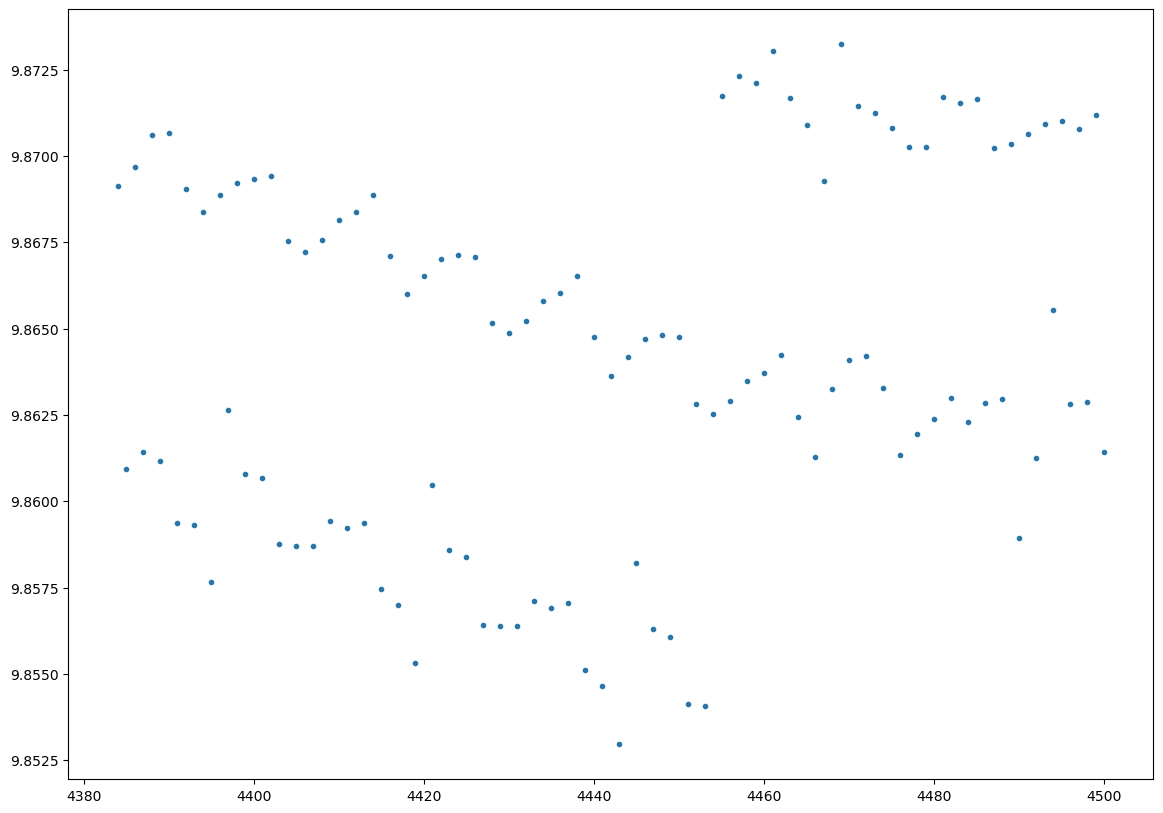

In [16]:
plt.figure(figsize=(14,10))
plt.plot(df2['num_steps'],df2['CRR_DB'],'o', markersize=3)
plt.show()